[Preprocessing done]

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9696    0.9845     56864
           1     0.0474    0.8776    0.0899        98

    accuracy                         0.9694     56962
   macro avg     0.5236    0.9236    0.5372     56962
weighted avg     0.9981    0.9694    0.9829     56962

Confusion Matrix:
 [[55135  1729]
 [   12    86]]
ROC-AUC: 0.9165621985288207


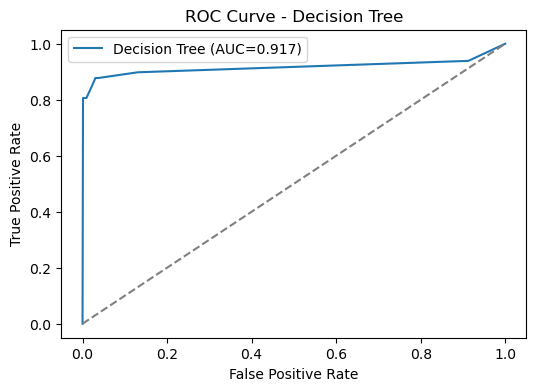

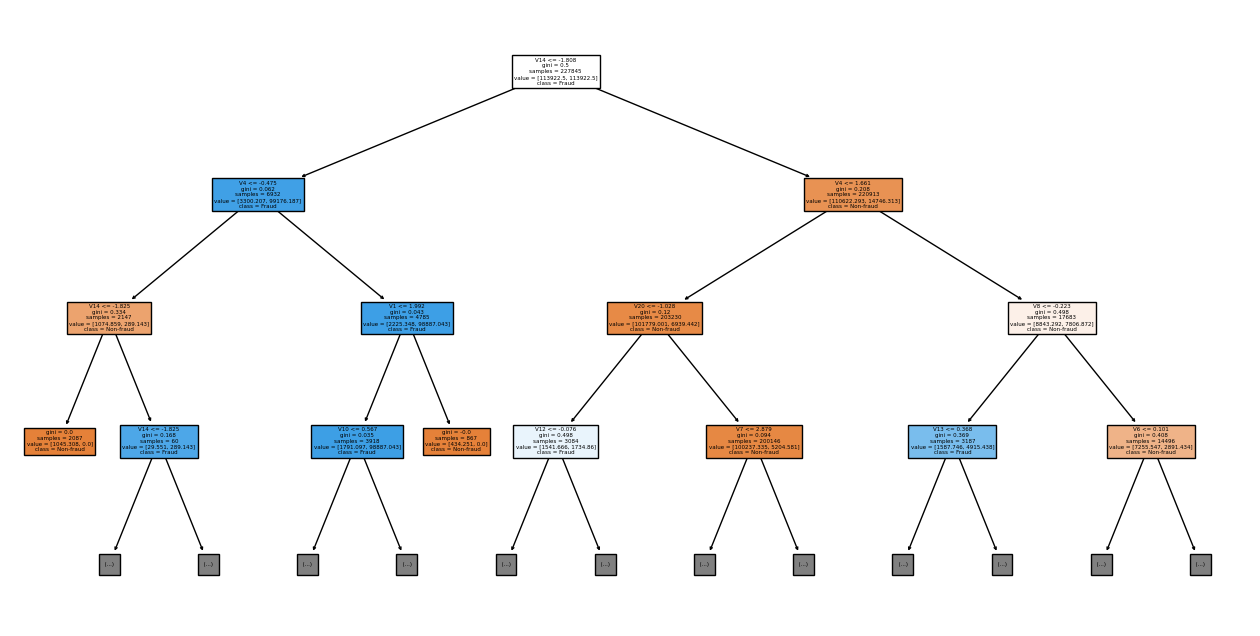

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


# Load dataset
df = pd.read_csv("creditcard.csv")

# Target column
y = df["Class"]
X = df.drop(columns=["Class"])

# Data Preprocessing
# Cleaning: drop duplicates
df = df.drop_duplicates()

# Missing values: (dataset has no missing, but show step for completeness)
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Outliers: clip Amount at 1st and 99th percentile
q1, q99 = np.percentile(X["Amount"], [1, 99])
X["Amount"] = np.clip(X["Amount"], q1, q99)

print("[Preprocessing done]")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train Decision Tree
# Simple tree with limited depth to avoid overfitting
clf = DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC={roc_auc_score(y_test,y_prob):.3f})")
plt.plot([0,1], [0,1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()


# Tree Visualization
plt.figure(figsize=(16,8))
plot_tree(
    clf, 
    feature_names=list(X.columns),   # 转换成 list
    class_names=["Non-fraud","Fraud"], 
    filled=True, 
    max_depth=3
)
plt.show()